In [13]:
import csv
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Load dataset from CSV
dataset_file = "clean2.data.csv"  # Update with the path to your combined CSV file
file_dataset = open(dataset_file, mode='r')
csvreader_dataset = csv.reader(file_dataset)
next(csvreader_dataset)  # Skip headers

# Initialize lists to store training and test data
train_data = []
test_data = []

# Read data from CSV and separate into training and test data
for i, row in enumerate(csvreader_dataset):
    if i < 3600:
        train_data.append(row)
    else:
        test_data.append(row)

# Close CSV file
file_dataset.close()

# Convert lists to numpy arrays
train_data = np.array(train_data)
test_data = np.array(test_data)

# Separate features and labels for training data
X_train = train_data[:, 2:-1].astype(float)  # Assuming features start from column index 2 and end before the last column
y_train = train_data[:, -1]
rIndex = np.random.permutation(len(train_data))
X_train = X_train[rIndex]
y_train = y_train[rIndex]
y_train = np.where(y_train=="1.", 1, -1)

# Separate features and labels for test data
X_test = test_data[:, 2:-1].astype(float)
y_test = test_data[:, -1]
y_test = np.where(y_test=="1.", 1, -1) 


# Display shapes of datasets
print("Shape of training data (X_train):", X_train.shape)
print("Shape of training labels (y_train):", y_train.shape)
print("Shape of testing data (X_test):", X_test.shape)
print("Shape of testing labels (y_test):", y_test.shape)


Shape of training data (X_train): (3600, 166)
Shape of training labels (y_train): (3600,)
Shape of testing data (X_test): (2997, 166)
Shape of testing labels (y_test): (2997,)


In [8]:
print(y_train)
print(y_test)

[ 1 -1  1 ... -1  1 -1]
[-1 -1 -1 ... -1 -1 -1]


In [9]:
# Define PercentCorrect function
def PercentCorrect(inputs, targets, weights):
    N = len(targets)
    targets = targets.astype(np.float64)
    nCorrect = 0
    for n in range(N):
        oneInput = inputs[n, :]
        if(targets[n] * np.dot(oneInput, weights) > 0):
            nCorrect += 1
    return 100 * nCorrect / N

In [18]:
# Randomly initialize weights
w = np.random.randn(X_train.shape[1])
print("Randomly generated weight vector (w):", w)

# Print initial percentage correct
print("Initial Percentage Correct: %6.2f" % (PercentCorrect(X_train, y_train, w)))

# Set parameters for training
MaxIter = 12000
alpha = 0.001
P_train = np.zeros(MaxIter)
P_test = np.zeros(MaxIter)

# Training loop
Ntrain = X_train.shape[0]
Ntest = X_test.shape[0]

for iter in range(MaxIter):
    r = np.floor(np.random.rand() * Ntrain).astype(int)
    x = X_train[r, :]

    if y_train[r] * np.dot(x, w) < 0:
        w += alpha * y_train[r] * x

    P_train[iter] = PercentCorrect(X_train, y_train, w)
    P_test[iter] = PercentCorrect(X_test, y_test, w)

# Print percentage correct after training
print("Percentage Correct After Training: %6.2f %6.2f" % (PercentCorrect(X_train, y_train, w), PercentCorrect(X_test, y_test, w)))


Randomly generated weight vector (w): [ 0.10917304 -1.04355432 -0.92030101  0.05090662  0.90547431  1.34316201
  2.19032866  0.6871589   1.15297023  0.21416038 -0.163202   -0.11527929
 -0.65081078  1.19742337  0.13064678  1.12497186  0.19671486 -0.52775853
 -0.75478497  0.81280781 -0.01432077 -0.32763789 -1.2370407   0.41967182
  1.14084034 -2.3879127  -0.25557028  0.84560912 -0.26683476 -1.48398217
  0.50549183  0.89055515  1.1156934   1.95119576  1.44692162 -1.03002407
 -0.46690175 -1.4618414  -0.72546853  0.22487337  0.25326767  0.82217851
 -0.3831757  -1.30985003  1.93346702  0.65548628 -1.63643286  0.25168564
 -0.97314965  3.14722799  0.30500848 -1.45223589  2.64780047 -0.01119674
  1.17793798 -1.3764341   0.64356847  0.29551859 -0.48161319 -0.39788349
 -1.12031231  1.78768535  0.22721444 -0.15504674 -0.73533825  0.88684636
 -0.55370029  0.44505044  0.04502254 -0.03312739 -1.15545931 -0.5017852
  0.68881678  0.83819538 -0.99293823  0.53905522 -0.93364334 -0.7477594
 -0.64882461 -1

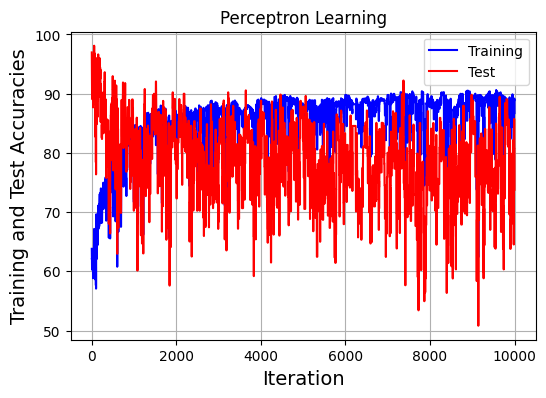

In [19]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(range(MaxIter), P_train, "b", label = "Training")
ax.plot(range(MaxIter), P_test, "r", label = "Test")
ax.grid(True)
ax.legend()
ax.set_title("Perceptron Learning")
ax.set_ylabel("Training and Test Accuracies", fontsize=14)
ax.set_xlabel("Iteration", fontsize=14)
plt.savefig("learningCurves.png")